Seaborn is a library that builds on top of matplotlib.
- Intregrated with pandas
- High level interface to plot data
- Additional functionality, better defaults
- Less code than matplotlib 
- All of the functionality is accessible at the top level.
- Works best when data is 'tidy'

Cons?

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pydataset import data

Seaborn API Reference  
https://seaborn.pydata.org/api.html#

### Different type of plots in Seaborn

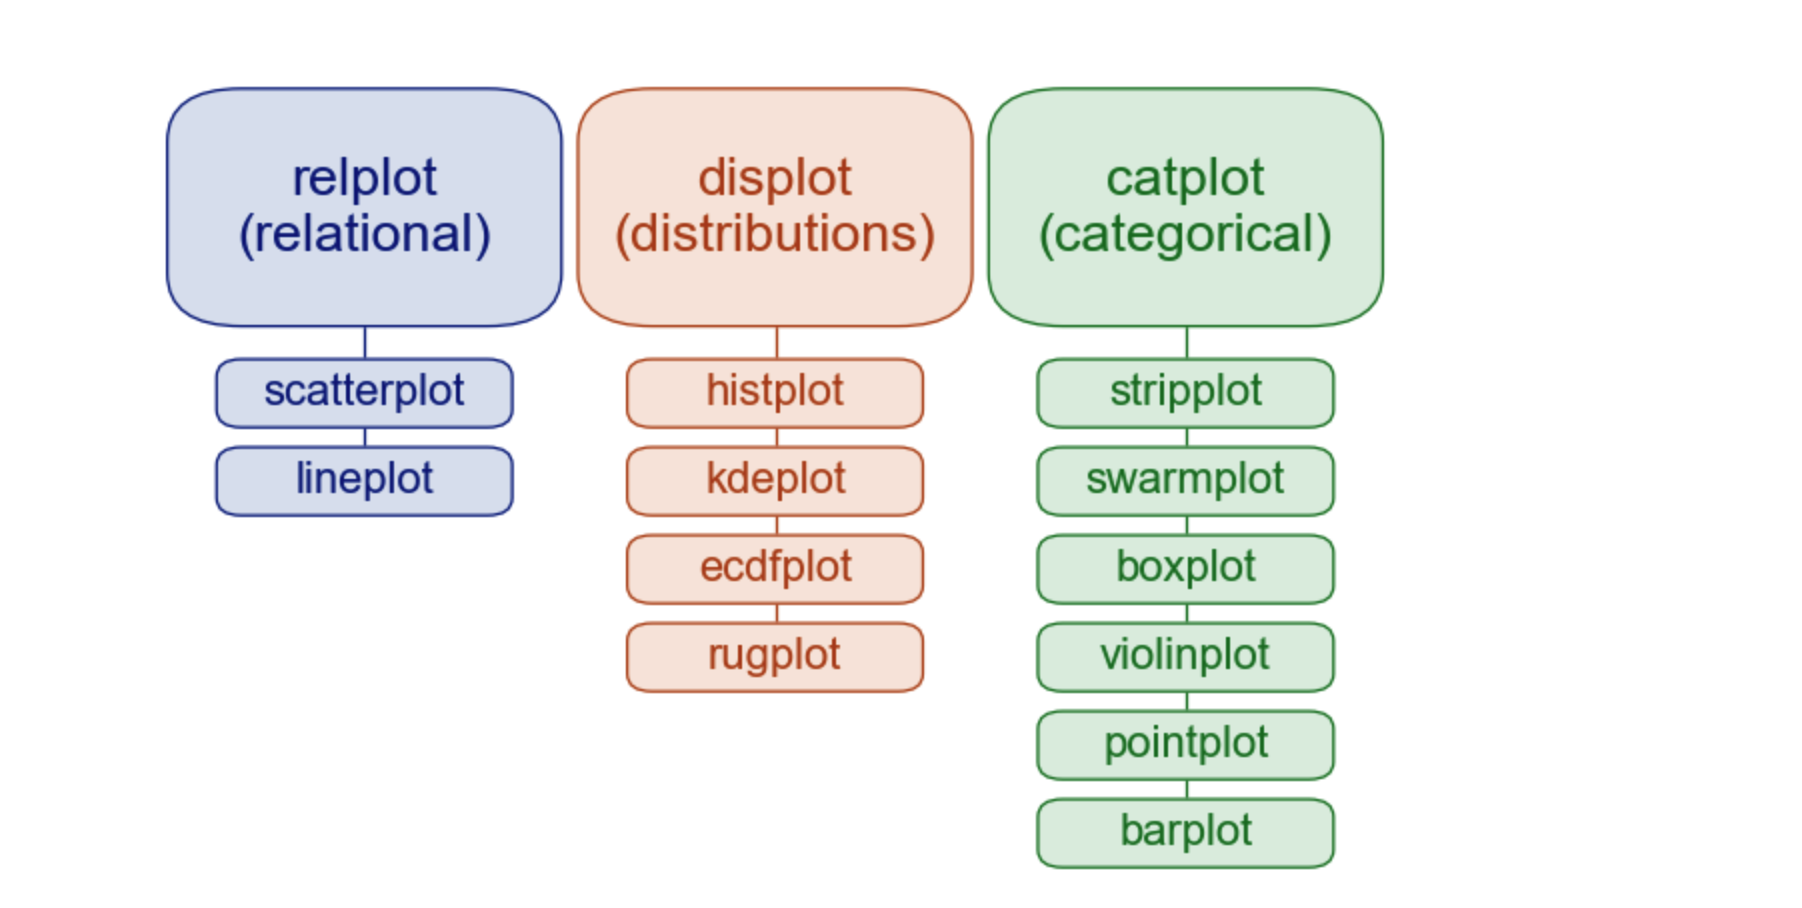

 - source: https://seaborn.pydata.org/tutorial/function_overview.html

In [3]:
# look for all datasets available in seaborn

print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'taxis', 'tips', 'titanic']


In [4]:
# Option 1 : Load directly from sns dataset
tips = sns.load_dataset('tips')

In [ ]:
# Option 2: Load using pydataset
tips = data('tips')

In [ ]:
data('tips', show_doc = True)

In [5]:
# check the head
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
# check for nulls and datatypes
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


#### Types of data:

- Continuous Data:- Numeric data with possibly infinite resolution
    - Height
    - Weight
    - total_bill and tip
    - temperature
- Categorical - Distinct categories
    - weekdays
    - Gender
    - 'smoker'
    - letter grades (A, B, C..)

- Discrete - Distinct numeric categories 
     - party_size - numeric but discete
     - number of customer complaints
     - number of flaws or defects.

### Relational Plots 

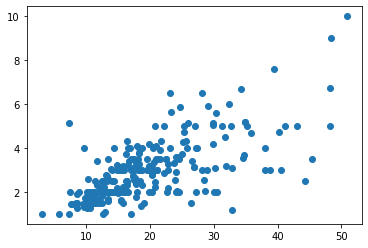

In [7]:
# scatterplot in matplotlib
                #x-value
plt.scatter(tips.total_bill, tips.tip)
                            #y-value

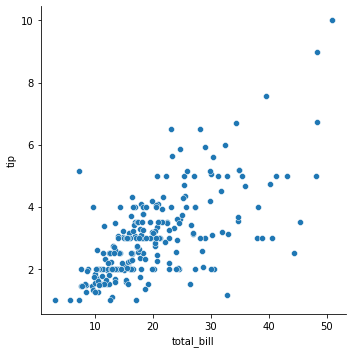

In [8]:
# Explore relationship between total_bill and tip using relplot

sns.relplot(data = tips, x = 'total_bill', y = 'tip')


In [11]:
# Update defaults (rc params in matplotlib)
sns.set_theme()  # https://seaborn.pydata.org/generated/seaborn.set_theme.html

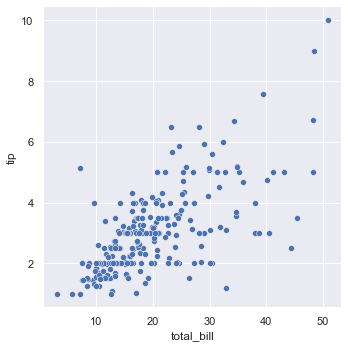

In [12]:
# same plot above, but with different sns defaults ()
sns.relplot(data = tips, x = 'total_bill', y = 'tip')


### hue, size and style arguments

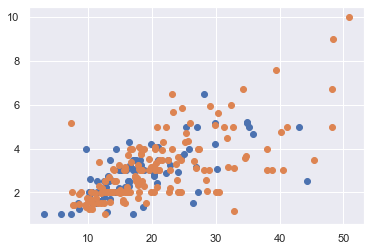

In [14]:
# visualize if relationship is different for smoker vs non-smoker (use hue argument)

# regular ---- metplot
plt.scatter(tips[tips.sex == 'Female'].total_bill, tips[tips.sex == 'Female'].tip)
plt.scatter(tips[tips.sex == 'Male'].total_bill, tips[tips.sex == 'Male'].tip)

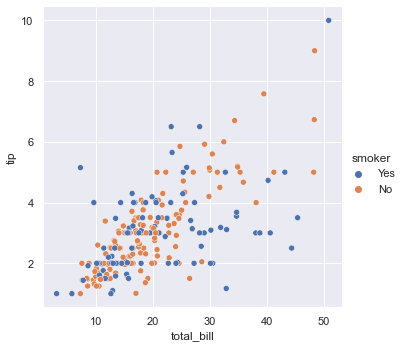

In [23]:
# visualize if relationship is different for smoker vs non-smoker (use hue argument)
# sns.relplot(data = tips, x = 'total_bill', y = 'tip')

# sns ---------                                                       |style is optional 
sns.relplot(data = tips, x = 'total_bill', y = 'tip', hue = 'smoker')

## Relplot with 'kind' argument

### kind changes the type of plot

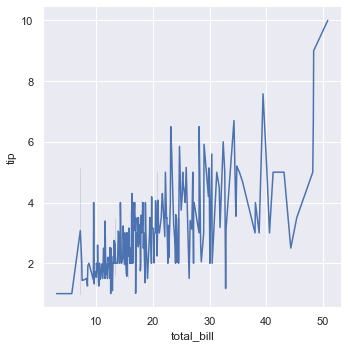

In [24]:
# lineplot for total bill vs tips - may not be appropriate in this case. Note use of 'kind' argument

sns.relplot(data = tips, x = 'total_bill', y = 'tip', kind = 'line')

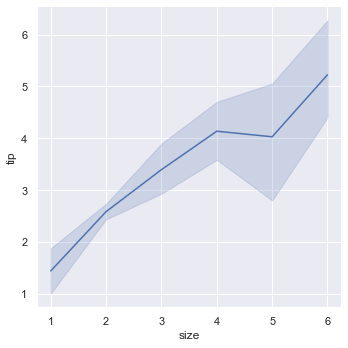

In [27]:
# lineplot for discrete values. The lineplot will use mean value at each size to draw a line 
# shaded region is 95% CI. Can be turned off with 'ci = None'

sns.relplot(data = tips, x = 'size', y = 'tip', kind = 'line') # will return mean,%95 confidance level

https://en.wikipedia.org/wiki/Bootstrapping_(statistics)

### Small multiple (https://en.wikipedia.org/wiki/Small_multiple)
- similar graphs or charts using the same scale and axes
- easy to compare


- Main idea: Pick a categorical features and create a chart for each category

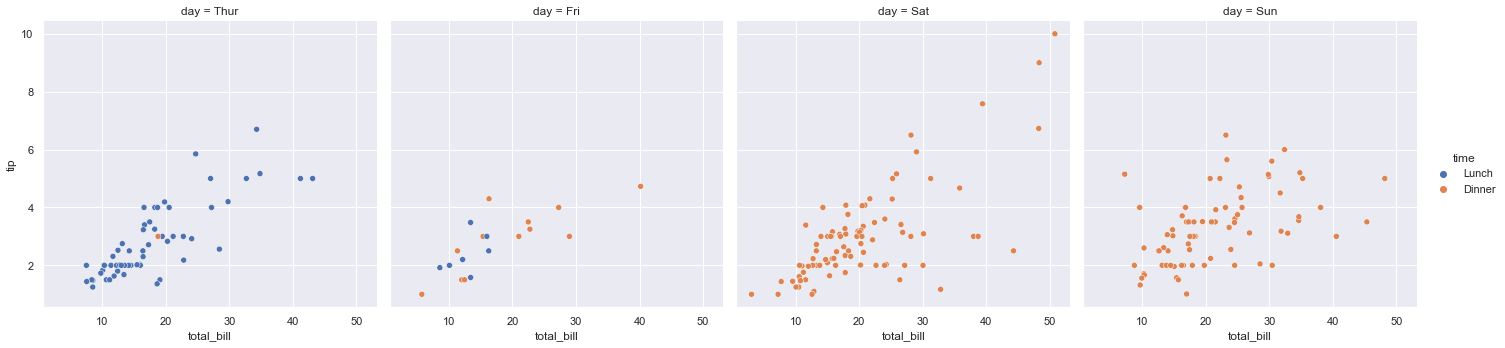

In [33]:
#  FacetGrid with 'col'

sns.relplot(data = tips, x = 'total_bill', y = 'tip', col = 'day', hue = 'time') 
# add col_order = ['Thurs', 'Fri','Sat','Sun']

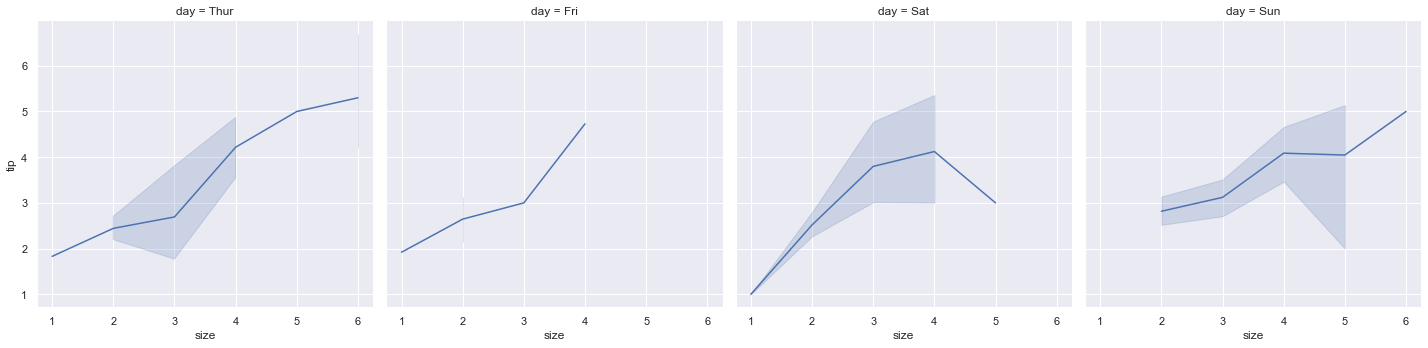

In [35]:
# Facetgrid with lineplot

sns.relplot(data = tips, x = 'size', y = 'tip', kind = 'line', col = 'day')

#### Key takeaways?
- Tip amount generally increases with total_bill
- Waiter works in evenings on Sun and sat
- Waiter works during lunchtime on Thursday


#### Ways to add DF columns to the chart (add new dimensions to the chart)

- hue
- col - creates subplots
- style


#### Using Scatterplot or lineplots instead of relplot

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

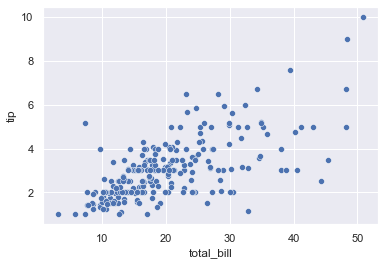

In [36]:
# scatterplot - returns an axes level object
sns.scatterplot(data = tips, x = 'total_bill', y = 'tip')

## Distributions: displot

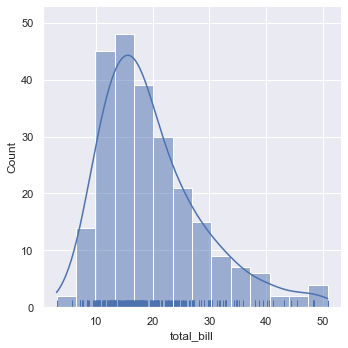

In [39]:
# displot for total_bill (hist, kde, rug)

#sns.displot(data = tips, x = 'total_bill')
#sns.displot(data = tips, x = 'total_bill', kde = True)  kde makes the line 
sns.displot(data = tips, x = 'total_bill', kde = True, rug = True)

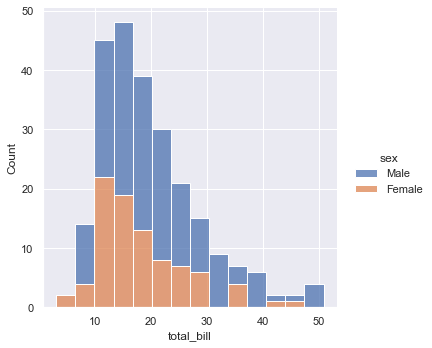

In [43]:
# histogram with hue and stacking and palette


sns.displot(data = tips,
            x = 'total_bill',
            hue = 'sex',
            multiple = 'stack')
#palette = change of color lie (['r', 'b'])

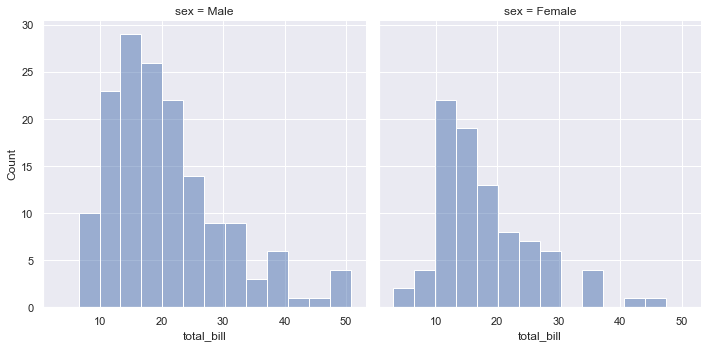

In [48]:
# use 'col' argument with 'sex' to create 'small multiples'

sns.displot(data = tips,
            x = 'total_bill',
            col = 'sex', 
            alpha = 0.5) #alpha dims the color down 

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

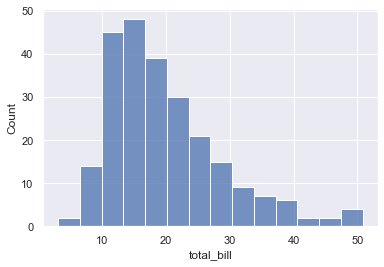

In [49]:
#histplot will return an axes level object

sns.histplot(data = tips, x = 'total_bill')

### Categorial Plots

#### Catplots

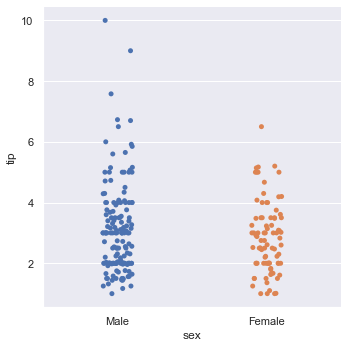

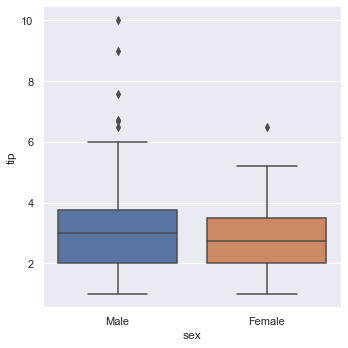

In [53]:
# we can make boxplot with kind = 'box' argument. Returns a figure level object
sns.catplot(data = tips, x= 'sex', y = 'tip')
sns.catplot(data = tips, x= 'sex', y = 'tip', kind = 'box') # you can add hue as well

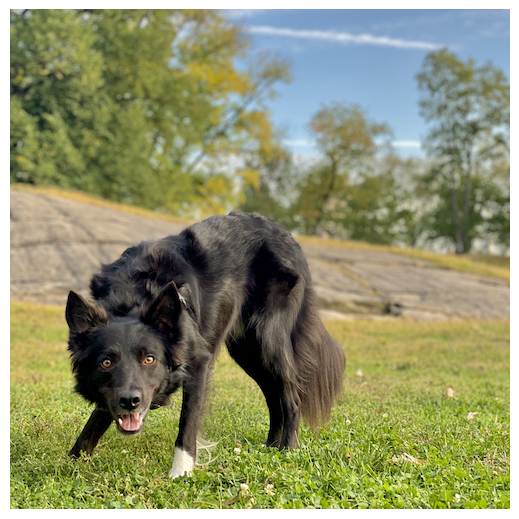

In [109]:
sns.dogplot()

In [104]:
# descriptive statistics for tip

tips.tip.describe() #should match the pots above 

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

<AxesSubplot:xlabel='sex', ylabel='tip'>

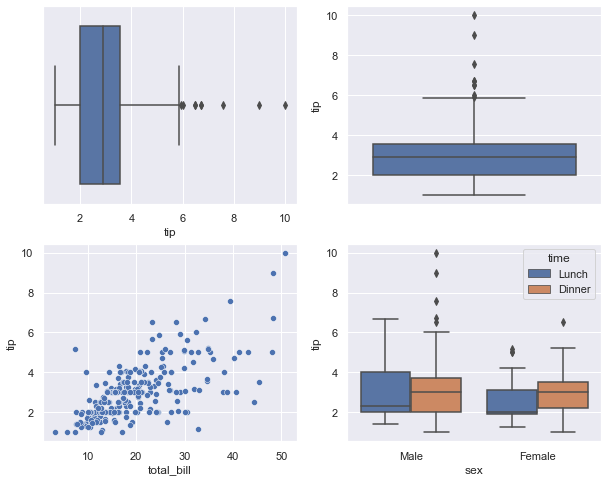

In [60]:
#  Create a figure with 4 subplots (Make sure to use axes-level seaborn functions)

# Create a figure with 4 boxplots
plt.figure(figsize = (10,8))

# first subplot
plt.subplot(221)
sns.boxplot(data = tips, x = 'tip')

# Second subplot
plt.subplot(222)
sns.boxplot(data = tips, y = 'tip')


#third subplot
plt.subplot(223)
sns.scatterplot(data = tips, y = 'tip', x = 'total_bill')# this will make it 

# 4th subplot
plt.subplot(224)
sns.boxplot(data = tips, y = 'tip', x = 'sex', hue = 'time')


<AxesSubplot:ylabel='tip'>

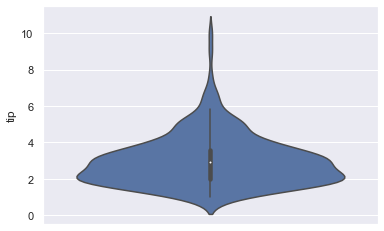

In [62]:
sns.violinplot(data = tips, y = 'tip')

<AxesSubplot:ylabel='tip'>

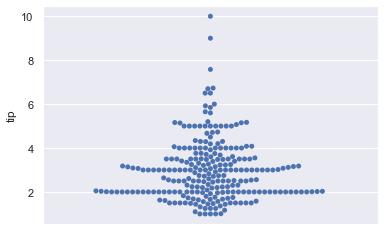

In [63]:
sns.swarmplot(data = tips, y = 'tip')

<AxesSubplot:xlabel='sex', ylabel='tip'>

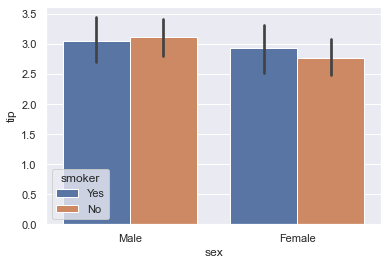

In [75]:
# bar plot 'tip' by gender. Shows mean for each category instead with CI
# hue is to compare them by
# estimator adds a function to it 
sns.barplot(data = tips, y = 'tip', x = 'sex', hue = 'smoker', estimator = np.mean)

#### Pairplot

In [64]:
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

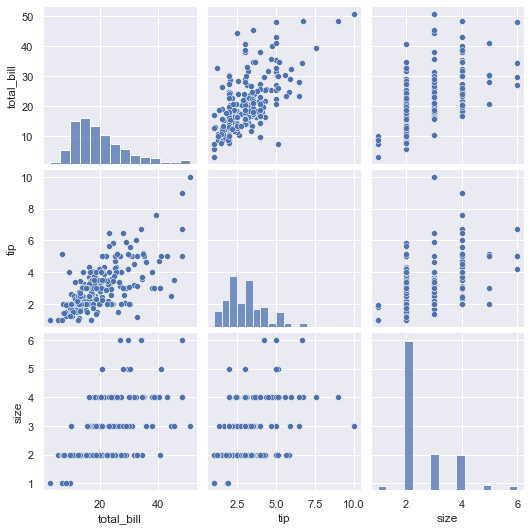

In [78]:
# pairplot for whole dataframe

sns.pairplot(tips)

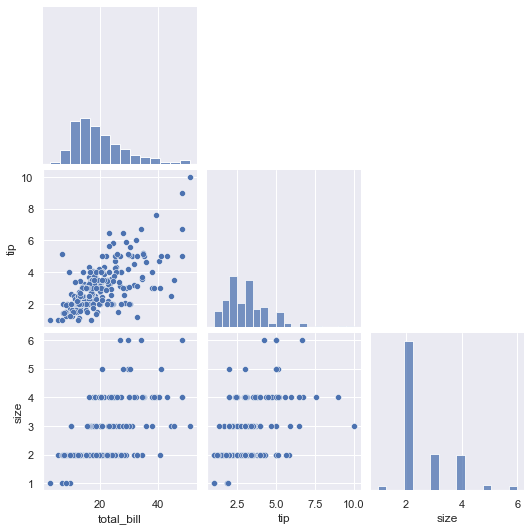

In [79]:
# argument corner = True will not render duplicate plots

sns.pairplot(tips, corner = True)

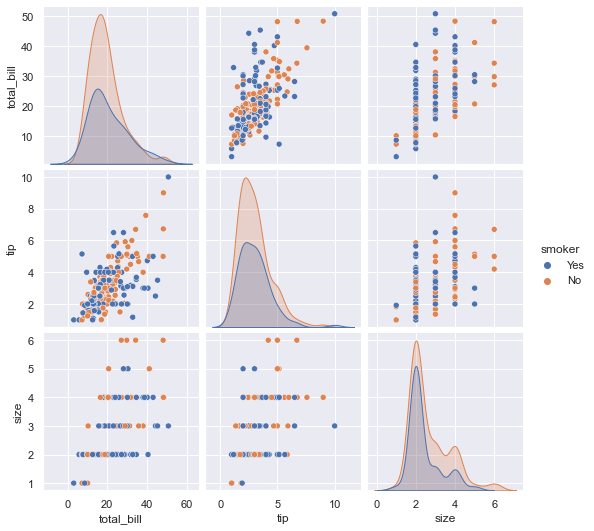

In [84]:
# use hue argument to visualize relationship based of different categories

sns.pairplot(tips, hue = 'smoker')

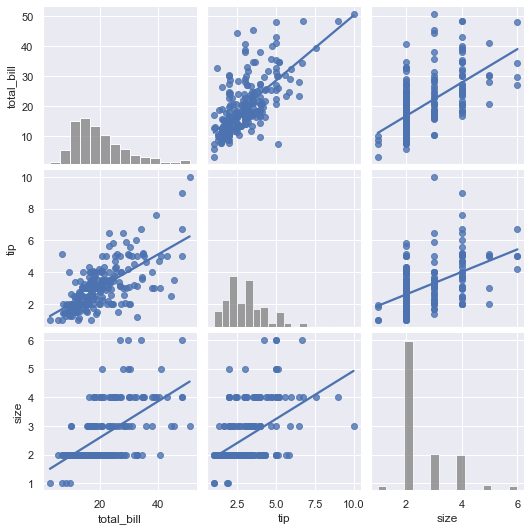

In [85]:
# use different plot type. 'reg' plot instead of 'scatter'

sns.pairplot(tips, diag_kind= 'hist',
            diag_kws= {'color': 'gray'},
            kind = 'reg',
            plot_kws={'ci': None})

#### Heatmap

In [86]:
#crosstab of time vs smoker
ctab = pd.crosstab(tips.time, tips.smoker)
ctab

smoker,Yes,No
time,,
Lunch,23,45
Dinner,70,106


<AxesSubplot:xlabel='smoker', ylabel='time'>

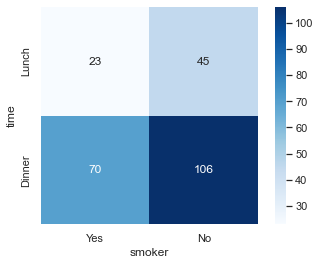

In [94]:
#create a heatmap

#sns.heatmap(ctab, cmap = 'Blues', annot = True, square = True)
sns.heatmap(ctab,annot = True, square = True, fmt = '0.0f', cmap = 'Blues')

Seaborn color palettes: https://seaborn.pydata.org/tutorial/color_palettes.html  
Check out this great post too: https://medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f

- SEQUENTIAL: e.g. different shades of same color.  Appropriate when data range from relatively low or uninteresting values to relatively high or interesting values (or vice versa)
- DIVERGING - highlight both low and high values

In [88]:
# Heatmap using mpg dataset

mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [89]:
# calculate correlation for numeric variables using panda's .corr() method

mpg.corr()

,displ,year,cyl,cty,hwy
displ,1.000000,0.147843,0.930227,-0.798524,-0.766020
year,0.147843,1.000000,0.122245,-0.037232,0.002158
cyl,0.930227,0.122245,1.000000,-0.805771,-0.761912
cty,-0.798524,-0.037232,-0.805771,1.000000,0.955916
hwy,-0.766020,0.002158,-0.761912,0.955916,1.000000


In [90]:
labels = ['Displacement', 'Model Year', 'cylinders', 'City MPG', 'Highway MPG']

<AxesSubplot:>

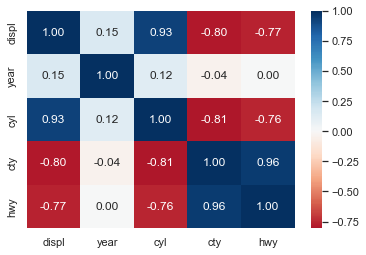

In [102]:
# heatmap for correlation table above
sns.heatmap(mpg.corr(), annot = True, fmt= '0.2f', cmap = 'RdBu', center = 0) #_r will reverse the colors,
# center 0 means, to make 0 at white
#linewith will make the borders bigger.
#xticklabels = labels
#yticklabels = labels will change the way the name changes view